# **Grass Health Identifier**

In [ ]:
!pip install tensorflow==2.9.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 81.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 63.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 96.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 40.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 55.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 41.9 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.5.26
    Uninstalling flatbuffers-23.5.26:
      Successfully uninstalled flatbuffers-23.5.26
  Attempting uninstall: ten

In [ ]:
#Import Libraries
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

#Import Machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

#Import GUI
import tkinter as tk
from tkinter import filedialog


In [14]:
from google.colab import drive
drive.mount('/content/drive')
# Image paths
train_images = '/content/drive/MyDrive/Capstone_Files/biomass_data/train/images'
test_images = '/content/drive/MyDrive/Capstone_Files/biomass_data/test/images'

# Lists to store paths.
image_paths = []
train_paths = []
test_paths = []

# Loop through the files and collect image paths, with a customizable sample size.
for i, filename in enumerate(os.listdir(train_images)):
    if i % 1 == 0:
        image_path = os.path.join(train_images, filename)
        train_paths.append(image_path)

for i, filename in enumerate(os.listdir(test_images)):
    if i % 1 == 0:
        image_path = os.path.join(test_images, filename)
        test_paths.append(image_path)

# Loop through the files and collect image paths, with a customizable sample size.
for i, filename in enumerate(os.listdir(train_images)):
    if i % 1 == 0:
        image_path = os.path.join(train_images, filename)
        image_paths.append(image_path)

for i, filename in enumerate(os.listdir(test_images)):
    if i % 1 == 0:
        image_path = os.path.join(test_images, filename)
        image_paths.append(image_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Exploratory Data Analysis (EDA)

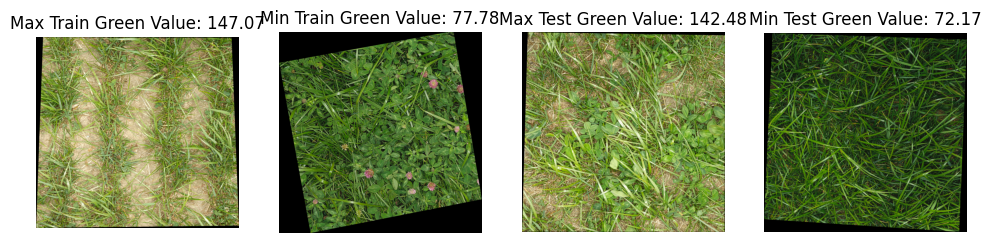

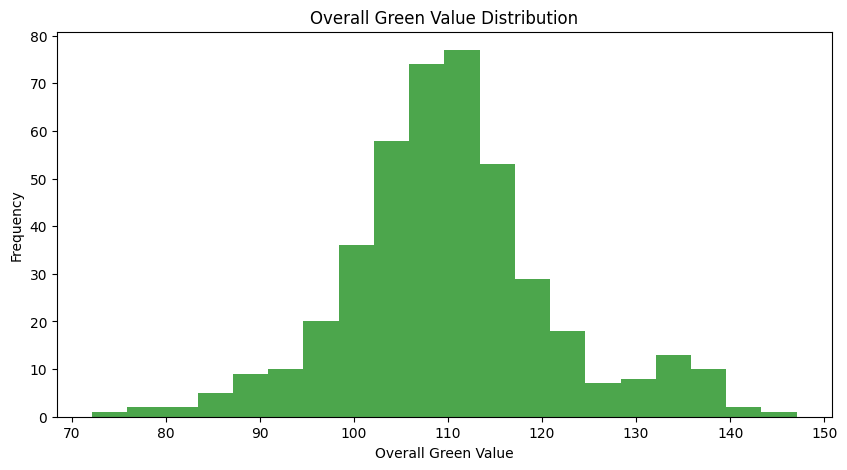

In [15]:
#EDA Q1 Do the green channels indicate a healthy grass?
#Extract the Green Channels
# Function to calculate overall green value from an image
def calculate_green_value(image_path):
    image = cv2.imread(image_path)

    # Convert BGR to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Extract the green channel (channel 1 in RGB)
    green_channel = image_rgb[:, :, 1]

    # Calculate the overall green value (mean of all pixel values in the green channel)
    green_value = np.mean(green_channel, axis=(0, 1))
    return green_value

# List to store overall green values and corresponding image paths
overall_green_values = []
image_path_values = []

# Calculate and store overall green values for train images
for image_path in train_paths:
    green_value = calculate_green_value(image_path)
    overall_green_values.append(green_value)
    image_path_values.append(image_path)

# Calculate and store overall green values for test images
for image_path in test_paths:
    green_value = calculate_green_value(image_path)
    overall_green_values.append(green_value)
    image_path_values.append(image_path)

# Separate green values for train and test datasets
train_green_values = overall_green_values[:len(train_paths)]
test_green_values = overall_green_values[len(train_paths):]

# Find the maximum and minimum green values for train and test datasets
train_max_green_value = max(train_green_values)
train_min_green_value = min(train_green_values)
test_max_green_value = max(test_green_values)
test_min_green_value = min(test_green_values)

# Display the images with the maximum and minimum green values for train and test datasets
train_image_max_index = train_green_values.index(train_max_green_value)
train_image_min_index = train_green_values.index(train_min_green_value)
test_image_max_index = test_green_values.index(test_max_green_value)
test_image_min_index = test_green_values.index(test_min_green_value)

train_image_path_max = train_paths[train_image_max_index]
train_image_path_min = train_paths[train_image_min_index]
test_image_path_max = test_paths[test_image_max_index]
test_image_path_min = test_paths[test_image_min_index]

train_image_max = cv2.imread(train_image_path_max)
train_image_min = cv2.imread(train_image_path_min)
test_image_max = cv2.imread(test_image_path_max)
test_image_min = cv2.imread(test_image_path_min)

plt.figure(figsize=(12, 12))

plt.subplot(341), plt.imshow(cv2.cvtColor(train_image_max, cv2.COLOR_BGR2RGB)), plt.title(f'Max Train Green Value: {train_max_green_value:.2f}'), plt.axis('off')

plt.subplot(342), plt.imshow(cv2.cvtColor(train_image_min, cv2.COLOR_BGR2RGB)), plt.title(f'Min Train Green Value: {train_min_green_value:.2f}'), plt.axis('off')

plt.subplot(343), plt.imshow(cv2.cvtColor(test_image_max, cv2.COLOR_BGR2RGB)), plt.title(f'Max Test Green Value: {test_max_green_value:.2f}'), plt.axis('off')

plt.subplot(344), plt.imshow(cv2.cvtColor(test_image_min, cv2.COLOR_BGR2RGB)), plt.title(f'Min Test Green Value: {test_min_green_value:.2f}'), plt.axis('off')

plt.show()

# Plot the overall green values
plt.figure(figsize=(10, 5))
plt.hist(overall_green_values, bins=20, color='green', alpha=0.7)
plt.xlabel('Overall Green Value')
plt.ylabel('Frequency')
plt.title('Overall Green Value Distribution')
plt.show()

The green value works to a certain degree, but it is influenced by the colour yellow, as with RGB yellow is made out of Green and Red.

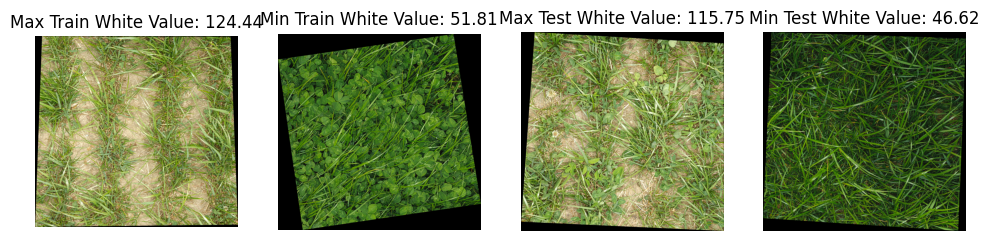

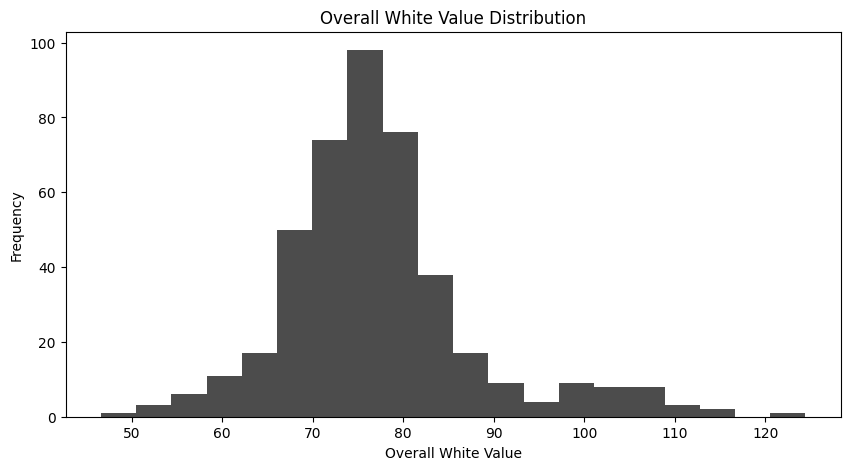

In [16]:
#EDA Q2 Does the white value indicate a healthy grass?
#Extracting the White Values
# Function to calculate overall white value from an image
def calculate_white_value(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Calculate the overall white value (mean of all pixel values in the image)
    white_value = np.mean(image)
    return white_value

# List to store overall white values and corresponding image paths
overall_white_values = []
image_path_values = []

# Calculate and store overall white values for train images
for image_path in train_paths:
    white_value = calculate_white_value(image_path)
    overall_white_values.append(white_value)
    image_path_values.append(image_path)

# Calculate and store overall white values for test images
for image_path in test_paths:
    white_value = calculate_white_value(image_path)
    overall_white_values.append(white_value)
    image_path_values.append(image_path)

# Separate white values for train and test datasets
train_white_values = overall_white_values[:len(train_paths)]
test_white_values = overall_white_values[len(train_paths):]

# Find the maximum and minimum white values for train and test datasets
train_max_white_value = max(train_white_values)
train_min_white_value = min(train_white_values)
test_max_white_value = max(test_white_values)
test_min_white_value = min(test_white_values)

# Display the images with the maximum and minimum white values for train and test datasets
train_image_max_index = train_white_values.index(train_max_white_value)
train_image_min_index = train_white_values.index(train_min_white_value)
test_image_max_index = test_white_values.index(test_max_white_value)
test_image_min_index = test_white_values.index(test_min_white_value)

train_image_path_max = train_paths[train_image_max_index]
train_image_path_min = train_paths[train_image_min_index]
test_image_path_max = test_paths[test_image_max_index]
test_image_path_min = test_paths[test_image_min_index]

train_image_max = cv2.imread(train_image_path_max)
train_image_min = cv2.imread(train_image_path_min)
test_image_max = cv2.imread(test_image_path_max)
test_image_min = cv2.imread(test_image_path_min)

plt.figure(figsize=(12, 12))

plt.subplot(341), plt.imshow(cv2.cvtColor(train_image_max, cv2.COLOR_BGR2RGB)), plt.title(f'Max Train White Value: {train_max_white_value:.2f}'), plt.axis('off')

plt.subplot(342), plt.imshow(cv2.cvtColor(train_image_min, cv2.COLOR_BGR2RGB)), plt.title(f'Min Train White Value: {train_min_white_value:.2f}'), plt.axis('off')

plt.subplot(343), plt.imshow(cv2.cvtColor(test_image_max, cv2.COLOR_BGR2RGB)), plt.title(f'Max Test White Value: {test_max_white_value:.2f}'), plt.axis('off')

plt.subplot(344), plt.imshow(cv2.cvtColor(test_image_min, cv2.COLOR_BGR2RGB)), plt.title(f'Min Test White Value: {test_min_white_value:.2f}'), plt.axis('off')

plt.show()

# Plot the overall white values
plt.figure(figsize=(10, 5))
plt.hist(overall_white_values, bins=20, color='black', alpha=0.7)
plt.xlabel('Overall White Value')
plt.ylabel('Frequency')
plt.title('Overall White Value Distribution')
plt.show()

This functions better than the green value, but it is influenced by the black borders of the image. Using a corner detection program would be better.

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


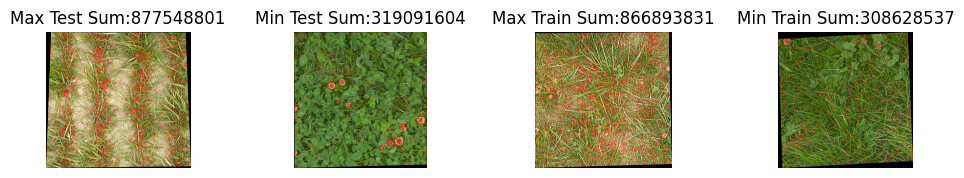

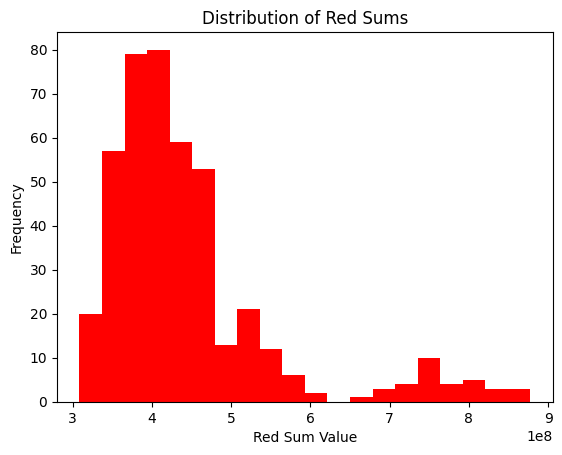

In [ ]:
#EDA Q3 Can corner detection be used to indicate healthy grass?
# Define a function to detect corners in an image and highlight them in red
def detect_corners(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)
    blocksize = 4
    kernel_size = 3
    dst = cv2.cornerHarris(gray, blocksize, kernel_size, 0.05)
    dst = cv2.dilate(dst, None)

    # Highlight the corners in red
    image_with_corners = image.copy()
    image_with_corners[dst > 0.01 * dst.max()] = [0, 0, 255]  # Set the color to red

    # Calculate the sum of red values in the image
    red_sum = np.sum(image_with_corners[:, :, 2])  # Index 2 corresponds to the red channel

    return red_sum, image_with_corners

# Define a function to process the entire dataset and find the images with the highest and lowest red sums
def process_dataset(dataset_paths):
    red_sums = []
    max_red_sum = 0  # To keep track of the highest red sum
    min_red_sum = float('inf')  # To keep track of the lowest red sum
    image_with_max_red_sum = None  # To store the path of the image with the highest red sum
    image_with_min_red_sum = None  # To store the path of the image with the lowest red sum

    for image_path in dataset_paths:
        image = cv2.imread(image_path)
        red_sum, image_with_corners = detect_corners(image)
        red_sums.append(red_sum)

        # Check if this image has the highest red sum so far
        if red_sum > max_red_sum:
            max_red_sum = red_sum
            image_with_max_red_sum = image_with_corners

        # Check if this image has the lowest red sum so far
        if red_sum < min_red_sum:
            min_red_sum = red_sum
            image_with_min_red_sum = image_with_corners

    return red_sums, image_with_max_red_sum, image_with_min_red_sum

# Process the selected dataset and find the images with the highest and lowest red sums
train_red_sums, train_image_max, train_image_min = process_dataset(train_paths)
test_red_sums, test_image_max, test_image_min = process_dataset(test_paths)

# Combine the red sums from both training and test datasets
red_sums = train_red_sums + test_red_sums

# Max and Min from test and train.
test_max_red_sum = max(test_red_sums)
test_min_red_sum = min(test_red_sums)
train_max_red_sum = max(train_red_sums)
train_min_red_sum = min(train_red_sums)

# Display the train image with the highest red sum
plt.figure(figsize=(12, 6))
plt.subplot(341), plt.imshow(cv2.cvtColor(train_image_max, cv2.COLOR_BGR2RGB)), plt.title(f'Max Test Sum:{test_max_red_sum}'), plt.axis('off')

# Display the train image with the lowest red sum
plt.subplot(342), plt.imshow(cv2.cvtColor(train_image_min, cv2.COLOR_BGR2RGB)), plt.title(f'Min Test Sum:{test_min_red_sum}'), plt.axis('off')

# Display the test image with the highest red sum
plt.subplot(343), plt.imshow(cv2.cvtColor(test_image_max, cv2.COLOR_BGR2RGB)), plt.title(f'Max Train Sum:{train_max_red_sum}'), plt.axis('off')

# Display the test image with the lowest red sum
plt.subplot(344), plt.imshow(cv2.cvtColor(test_image_min, cv2.COLOR_BGR2RGB)), plt.title(f'Min Train Sum:{train_min_red_sum}'), plt.axis('off')

plt.show()

# Plot the distribution of red sums
plt.hist(red_sums,color='red', bins=20)
plt.title('Distribution of Red Sums')
plt.xlabel('Red Sum Value')
plt.ylabel('Frequency')
plt.show()

Corner detection works considerable well, providing us with two clear groups of healthy and unhealthy grass. The red value also works to our favour, as stated before, yellow is made of the red and green channels, so by highlighting the corners, and having yellow grass, we alienate the unhealthy grass images from the rest.

##Predictive Data Analysis (PDA)

Enter the path of the image (or type 'exit' to quit): /content/drive/MyDrive/Capstone_Files/biomass_data/TestGrass/Grass4.jpg
Predicted grass health for Grass4.jpg: Healthy grass


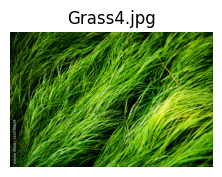

KeyboardInterrupt: ignored

In [17]:
#PDA Q4 can a program be created that can learn the difference between healthy and unhealthy grass?

# Modify the detect_corners function to return both red_sum and image_with_corners
def detect_corners(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)
    blocksize = 4
    kernel_size = 3
    dst = cv2.cornerHarris(gray, blocksize, kernel_size, 0.05)
    dst = cv2.dilate(dst, None)

    # Highlight the corners in red
    image_with_corners = image.copy()
    image_with_corners[dst > 0.01 * dst.max()] = [0, 0, 255]

    # Calculate the sum of red values in the image
    red_sum = np.sum(image_with_corners[:, :, 2])

    return red_sum, image_with_corners

# Function to predict grass health
def predict_grass_health(image_path, corner_threshold=200, red_sum_threshold=6.5e8):
    image = cv2.imread(image_path)
    red_sum, _ = detect_corners(image)

    if red_sum < corner_threshold:
        return "Unhealthy grass"
    elif red_sum > red_sum_threshold:
        return "Sick grass"
    else:
        return "Healthy grass"

# Modify the load_dataset function to use the correct parameters
def load_dataset():
    X = []
    y = []

    for image_path in image_paths:
        image = cv2.imread(image_path)
        red_sum, image_with_corners = detect_corners(image)
        if red_sum > 6.5e8:
            label = "Sick"
        else:
            label = "Healthy"

        X.append([red_sum])
        y.append(label)

    return X, y

# Train a classifier
X, y = load_dataset()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# Function to process and predict an image
def process_and_predict_image(image_path):
    result = predict_grass_health(image_path)
    image_name = os.path.basename(image_path)
    print(f"Predicted grass health for {image_name}: {result}")
    return cv2.imread(image_path), image_name

# Ask the user for an image path
while True:
    new_image_path = input("Enter the path of the image (or type 'exit' to quit): ")

    if new_image_path.lower() == 'exit':
        break
        # Exit the loop if the user types 'exit'

    if not os.path.isfile(new_image_path):
        print("The specified file does not exist. Please try again.")
        continue

    new_image, title = process_and_predict_image(new_image_path)

    # Display the user-provided image
    plt.figure(figsize=(12, 6))
    plt.subplot(341), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)), plt.title(title), plt.axis('off')
    plt.show()